<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Adam!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/8714ff16 ) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

You are doing a great job in this project! I left you a comment for you to address before I can approve it!

Looking forward to reviewing your next submission! Best of luck!
    
</div>


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>

    
<b>Overall Feedback</b>
    
Hello Adam,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v3:` section.

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
print(data.sample(10))
data.info()

      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
1378       1379    15682834   Johnstone          715     Spain  Female   35   
663         664    15788659     Howells          695    France    Male   46   
2676       2677    15641994        Meng          667   Germany    Male   43   
2989       2990    15636428  Sutherland          703     Spain  Female   45   
356         357    15611759     Simmons          850     Spain  Female   57   
8909       8910    15705085     Quesada          670     Spain  Female   29   
5909       5910    15713043   Siciliani          691    France  Female   33   
2285       2286    15783615       Ramos          630   Germany    Male   50   
3299       3300    15724527      Forbes          825    France    Male   34   
3659       3660    15664668      Zarate          534    France  Female   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1378     4.0   40169.88              2          1            

In [4]:
print(data['Tenure'].value_counts(dropna=False))

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Well done!

</div>


Since NaN takes up a good amount of the data we can use it as a category and keep it.

Extract the features

One Hot Encoding

In [5]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [6]:
feature_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
features_data = data[feature_columns]
data_ohe = pd.get_dummies(features_data, drop_first=True)

In [7]:
print(list(data_ohe))

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


Standardize the numbers.
For credit score we can use min max since there is a defined min and max.
Balance we use MinMaxScalar because we have a lot of 0 balance and using mean would not accoutn for it that much.
EstimatedSalary should also be MinMax Scalar becuase it has a uniform distribution.
Age we use standard scalar because it is normally distributed

In [8]:
print('Credit Score max: ', data_ohe['CreditScore'].max(), ', min: ', data_ohe['CreditScore'].min())
print('Balance max: ', data_ohe['Balance'].max(), ', min: ', data_ohe['Balance'].min())
print('EstimatedSalary max: ', data_ohe['EstimatedSalary'].max(), ', min: ', data_ohe['EstimatedSalary'].min())

Credit Score max:  850 , min:  350
Balance max:  250898.09 , min:  0.0
EstimatedSalary max:  199992.48 , min:  11.58


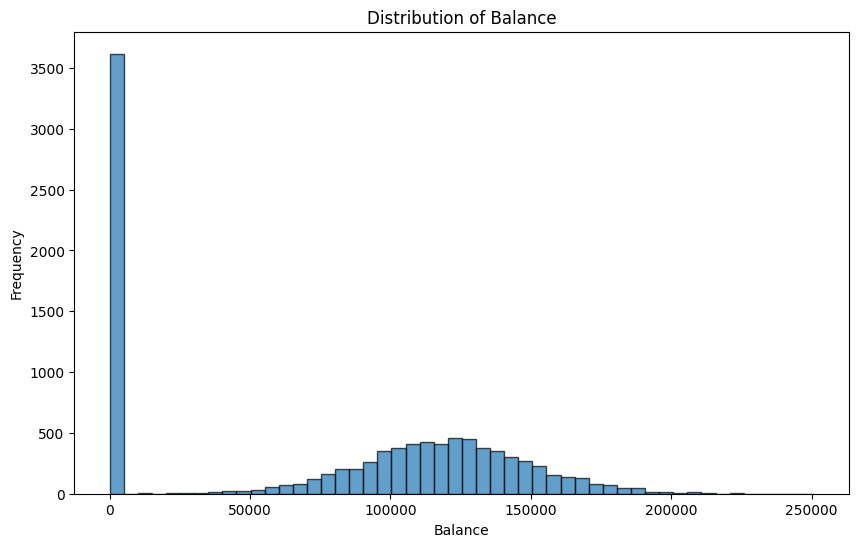

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_ohe['Balance'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

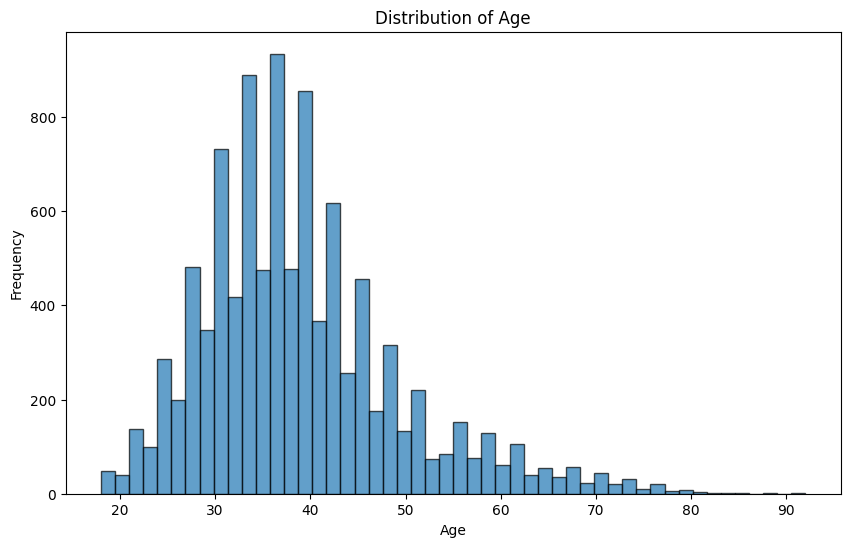

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data_ohe['Age'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

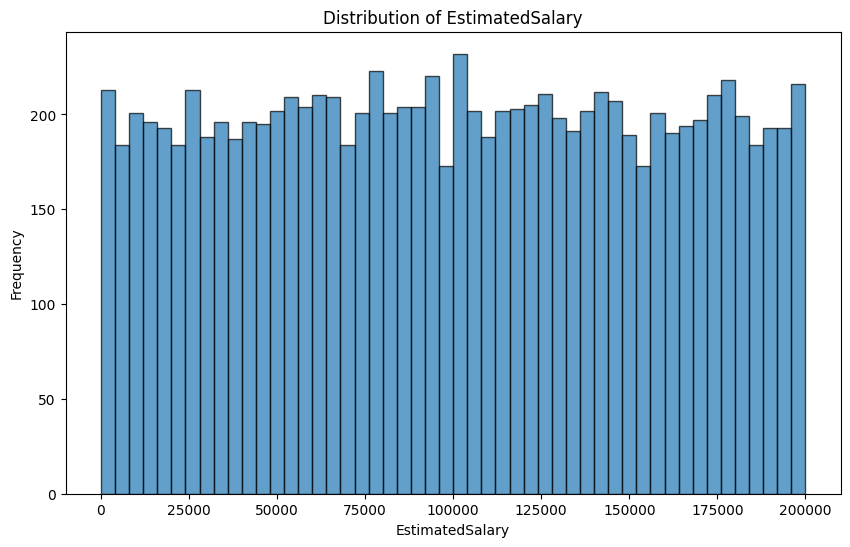

In [11]:
plt.figure(figsize=(10, 6))
plt
plt.hist(data_ohe['EstimatedSalary'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

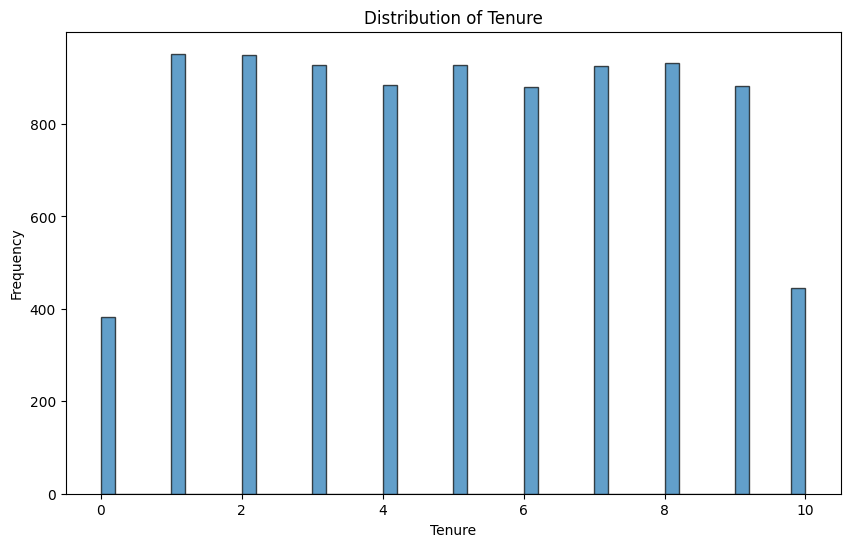

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data_ohe['Tenure'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

Change Tenure to ordinal category

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice work visualizing the distributions!
    
</div>


In [13]:
data_ohe['Tenure'].fillna(20.0, inplace=True)
print(data_ohe['Tenure'].value_counts(dropna=False))

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
20.0    909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


In [14]:
tenure_dict = {20.0: 0, 0.0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5, 5.0: 6, 6.0: 7, 7.0: 8, 8.0: 9, 9.0: 10, 10.0: 11}
data_ohe['Tenure'] = data_ohe['Tenure'].map(tenure_dict)
print(data_ohe['Tenure'].value_counts(dropna=False))

2     952
3     950
9     933
4     928
6     927
8     925
0     909
5     885
10    882
7     881
11    446
1     382
Name: Tenure, dtype: int64


Create the training, valid, and testing sets

In [15]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']
features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=12345
)

Apply the scalars
MinMaxScalar: CreditScore, Balance, EstimatedSalary
StandardScalar: Age

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), ['CreditScore', 'Balance', 'EstimatedSalary']),
        ('standard', StandardScaler(), ['Age']),
        ('passthrough', 'passthrough', ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'])
    ]
)

features_train_scaled = preprocessor.fit_transform(features_train)
features_valid_scaled = preprocessor.transform(features_valid)
features_test_scaled = preprocessor.transform(features_test)

In [18]:
column_names = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

features_train_df = pd.DataFrame(features_train_scaled, columns=column_names)
features_valid_df = pd.DataFrame(features_valid_scaled, columns=column_names)
features_test_df = pd.DataFrame(features_test_scaled, columns=column_names)
print(features_train_df.sample(10))

      CreditScore   Balance  EstimatedSalary       Age  Tenure  NumOfProducts  \
2730        0.418  0.000000         0.333358 -0.462218     5.0            2.0   
895         0.628  0.482510         0.848385 -0.368048     2.0            1.0   
4413        0.204  0.473749         0.494932 -0.838899     8.0            1.0   
5170        0.712  0.367509         0.688333 -0.838899     7.0            2.0   
398         0.518  0.497175         0.018638 -0.650558     8.0            1.0   
2006        0.368  0.343775         0.578237 -0.368048     0.0            2.0   
3112        0.124  0.000000         0.062139 -0.933069     6.0            2.0   
1621        0.782  0.490770         0.844134 -0.273878     9.0            2.0   
1337        0.858  0.445327         0.584368  0.950333    10.0            1.0   
1758        0.460  0.528221         0.473221  2.080374     9.0            1.0   

      HasCrCard  IsActiveMember  Geography_Germany  Geography_Spain  \
2730        1.0             1.0      

Build the model

Imbalance

Logistic Regression

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [20]:
model_lg = LogisticRegression(random_state=12345, solver='liblinear')

model_lg.fit(features_train_df, target_train)
predicted_valid_lg = model_lg.predict(features_valid_df)


In [21]:

probabilities_valid = model_lg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


In [22]:

print("=== LOGISTIC REGRESSION PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_lg):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_lg):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_lg):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_lg):.1%}")
print('AUC_ROC: ', auc_roc)


=== LOGISTIC REGRESSION PERFORMANCE ===

Accuracy:  81.8%
Precision: 63.1%
Recall:    24.5%
F1 Score:  35.3%
AUC_ROC:  0.5321309151591851


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job!
    
</div>


Decision Tree

In [23]:
param_distributions = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

In [24]:
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [25]:
random_search.fit(features_train_df, target_train)
best_dt = random_search.best_estimator_
predicted_valid_dt = best_dt.predict(features_valid_df)

In [26]:
probabilities_valid = best_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.4245607831459838


In [27]:
print("=== DECISION TREE PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_dt):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_dt):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_dt):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_dt):.1%}")

=== DECISION TREE PERFORMANCE ===

Accuracy:  85.2%
Precision: 69.1%
Recall:    48.3%
F1 Score:  56.9%


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice work with the Decision Tree model!
    
</div>


Random Forest

In [28]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [29]:
random_search.fit(features_train_df, target_train)
random_search
best_rf = random_search.best_estimator_
predicted_valid_rf = best_rf.predict(features_valid_df)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Make sure your code runs smoothly from start to finish!

You should always use the “Restart the kernel and run all cells” button to check that everything works properly without errors!
    
</div>


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done! Now everything works fine!

In [30]:
probabilities_valid = best_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.4840845926697933


In [31]:
print("=== RANDOM FOREST PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_rf):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_rf):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_rf):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_rf):.1%}")

=== RANDOM FOREST PERFORMANCE ===

Accuracy:  86.0%
Precision: 72.4%
Recall:    49.3%
F1 Score:  58.6%


Check for imbalance

In [32]:
print(target_train.value_counts())

0    4760
1    1240
Name: Exited, dtype: int64


We see that there is about 4 times as many 0's than 1's

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done! 

First imbalance approach we use is balanced class weight

In [33]:
model_lg_b = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lg_b.fit(features_train_df, target_train)
predicted_valid_lg_b = model_lg_b.predict(features_valid_df)

In [34]:
probabilities_valid = model_lg_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.540435246532172


In [35]:
print("=== LOGISTIC REGRESSION PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_lg_b):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_lg_b):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_lg_b):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_lg_b):.1%}")

=== LOGISTIC REGRESSION PERFORMANCE ===

Accuracy:  69.8%
Precision: 37.2%
Recall:    71.3%
F1 Score:  48.9%


Decision Tree

In [36]:
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [37]:
random_search.fit(features_train_df, target_train)
best_dt_b = random_search.best_estimator_
predicted_valid_dt_b = best_dt_b.predict(features_valid_df)

In [38]:
probabilities_valid = best_dt_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.4245607831459838


In [39]:
print("=== DECISION TREE PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_dt_b):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_dt_b):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_dt_b):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_dt_b):.1%}")

=== DECISION TREE PERFORMANCE ===

Accuracy:  75.9%
Precision: 44.4%
Recall:    75.7%
F1 Score:  56.0%


Random Forest

In [40]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [41]:
random_search.fit(features_train_df, target_train)
best_rf_b = random_search.best_estimator_
predicted_valid_rf_b = best_rf_b.predict(features_valid_df)

In [42]:
probabilities_valid = best_rf_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.42248179235216754


In [43]:
print("=== RANDOM FOREST PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_rf_b):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_rf_b):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_rf_b):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_rf_b):.1%}")

=== RANDOM FOREST PERFORMANCE ===

Accuracy:  82.5%
Precision: 55.8%
Recall:    63.9%
F1 Score:  59.6%


Here the random forest classifier is the only one that passed the 0.59 f1 score

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Everything is correct here!

Next imbalance approach we do is upsampling

In [44]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features = features.reset_index(drop=True)
    target = target.reset_index(drop=True)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [45]:

features_upsampled, target_upsampled = upsample(
    features_train_df, target_train, 4
)



In [46]:
print(target_upsampled.value_counts())

1    4960
0    4760
Name: Exited, dtype: int64


Logistic Regression

In [47]:
model_lg_up = LogisticRegression(random_state=12345, solver='liblinear')
model_lg_up.fit(features_upsampled, target_upsampled)
predicted_valid_lg_up = model_lg_up.predict(features_valid_df)

In [48]:
probabilities_valid = model_lg_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.5400490706965433


In [49]:
print("=== LOGISTIC REGRESSION PERFORMANCE ===")
print
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_lg_up):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_lg_up):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_lg_up):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_lg_up):.1%}")

=== LOGISTIC REGRESSION PERFORMANCE ===

Accuracy:  68.7%
Precision: 36.2%
Recall:    72.5%
F1 Score:  48.3%


Decision Tree

In [50]:
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [51]:
random_search.fit(features_upsampled, target_upsampled)
best_dt_up = random_search.best_estimator_
predicted_valid_dt_up = best_dt_up.predict(features_valid_df)

In [52]:
probabilities_valid = best_dt_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.4915599642671034


In [53]:
print("=== DECISION TREE PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_dt_up):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_dt_up):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_dt_up):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_dt_up):.1%}")

=== DECISION TREE PERFORMANCE ===

Accuracy:  77.5%
Precision: 44.9%
Recall:    51.5%
F1 Score:  48.0%


Random Forest

In [54]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [55]:
random_search.fit(features_upsampled, target_upsampled)
best_rf_up = random_search.best_estimator_
predicted_valid_rf_up = best_rf_up.predict(features_valid_df)

In [56]:
probabilities_valid = best_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.4254494528400208


In [57]:
print("=== RANDOM FOREST PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_rf_up):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_rf_up):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_rf_up):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_rf_up):.1%}")

=== RANDOM FOREST PERFORMANCE ===

Accuracy:  83.8%
Precision: 61.1%
Recall:    54.5%
F1 Score:  57.6%


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done! 

Let's try downsampling. 
Upsampling can cause overfitting

In [58]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [59]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

In [60]:
print(target_downsampled.value_counts())

1    1240
0    1190
Name: Exited, dtype: int64


Logistic Regression

In [61]:
model_lg_d = LogisticRegression(random_state=12345, solver='liblinear')
model_lg_d.fit(features_downsampled, target_downsampled)
predicted_valid_lg_d = model_lg_d.predict(features_valid_df)

In [62]:
probabilities_valid = model_lg_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.7231398421797068


In [63]:
print("=== LOGISTIC REGRESSION PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_lg_d):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_lg_d):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_lg_d):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_lg_d):.1%}")

=== LOGISTIC REGRESSION PERFORMANCE ===

Accuracy:  79.0%
Precision: 34.7%
Recall:    4.2%
F1 Score:  7.5%


Decision Tree

In [64]:
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [65]:
random_search.fit(features_downsampled, target_downsampled)
best_dt_d = random_search.best_estimator_
predicted_valid_dt_d = best_dt_d.predict(features_valid_df)

In [66]:
probabilities_valid = best_dt_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.8180227797215811


In [67]:
print("=== DECISION TREE PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_dt_d):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_dt_d):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_dt_d):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_dt_d):.1%}")

=== DECISION TREE PERFORMANCE ===

Accuracy:  33.2%
Precision: 19.5%
Recall:    73.5%
F1 Score:  30.8%


Random Forest

In [68]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    random_state=42,
    scoring='f1'
)

In [69]:
random_search.fit(features_downsampled, target_downsampled)
best_rf_d = random_search.best_estimator_
predicted_valid_rf_d = best_rf_d.predict(features_valid_df)

In [70]:
probabilities_valid = best_rf_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

AUC_ROC:  0.8389065175314524


In [71]:
print("=== RANDOM FOREST PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_valid, predicted_valid_rf_d):.1%}")
print(f"Precision: {precision_score(target_valid, predicted_valid_rf_d):.1%}")
print(f"Recall:    {recall_score(target_valid, predicted_valid_rf_d):.1%}")
print(f"F1 Score:  {f1_score(target_valid, predicted_valid_rf_d):.1%}")

=== RANDOM FOREST PERFORMANCE ===

Accuracy:  27.0%
Precision: 19.6%
Recall:    83.9%
F1 Score:  31.7%


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done! 

The best perfoming one was the balanced random forest classifier

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done! Since your project has been a bit long, the reader might forget the values obtained, which is why an excellent idea is to summarize all the results in a table so that it is clear which one was the best.

In [72]:
prediction_test = best_rf_b.predict(features_test_df)

In [73]:
print("=== RANDOM FOREST PERFORMANCE ===")
print()
print(f"Accuracy:  {accuracy_score(target_test, prediction_test):.1%}")
print(f"Precision: {precision_score(target_test, prediction_test):.1%}")
print(f"Recall:    {recall_score(target_test, prediction_test):.1%}")
print(f"F1 Score:  {f1_score(target_test, prediction_test):.1%}")

=== RANDOM FOREST PERFORMANCE ===

Accuracy:  84.4%
Precision: 59.1%
Recall:    67.2%
F1 Score:  62.9%


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

Conclusion:
Here we can see that the only model that passed the 0.59 f1 score was the normal balanced Random forest classifier. Here we see that there was a slight improvment from the non balanced one and the upsampled one. The downsample ones did not perform well due to the lack of data and the upsampled one also did not perform as expected probably due to overfitting. The second best performing model was the normal random forest model. The worst performing model was the downsampled logistical regression model

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
You did a solid job exploring different techniques to handle class imbalance and comparing their impact on model performance. You tested multiple approaches and carefully evaluated their results using the F1 score.

You correctly identified that the balanced Random Forest classifier was the most effective, surpassing the 0.59 F1 threshold.

You noticed the slight improvement from balancing compared to the non‑balanced and upsampled versions, which shows good analytical thinking.

You recognized the limitations of downsampling (loss of data) and upsampling (risk of overfitting), which is an important insight for real‑world applications.

Your comparison across models demonstrates a systematic approach to experimentation.